In [1]:
import pandas as pd
import os 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
pokemon = pd.read_csv('E:/Donlow/pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
pokemon = pokemon.set_index('#')
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
combats = pd.read_csv('E:/Donlow/combats.csv')
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [6]:
pokemon['Type 2'].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Ice          14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [7]:
pokemon['Type 2'].fillna('empty',inplace=True)
pokemon['Type 2'].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Ghost        14
Water        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [8]:
pokemon['Type 1'] = pokemon['Type 1'].astype('category')
pokemon['Type 2'] = pokemon['Type 2'].astype('category')
pokemon['Legendary'] = pokemon['Legendary'].astype('int64')

pokemon.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int64
dtype: object

In [9]:
one_hot = pd.get_dummies(pokemon['Type 1'])
one_hot.head()

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
two_hot = pd.get_dummies(pokemon['Type 2'])
two_hot.head()

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
combine_hot = one_hot.add(two_hot,fill_value=0).astype('int64')
pokemon = pokemon.join(combine_hot)
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,...,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,...,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,...,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,...,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,...,0,0,0,0,0,0,0,0,0,1


In [12]:
dict(enumerate(pokemon['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [13]:
pokemon['Type 2'].cat.codes.head(10)

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

In [14]:
pokemon['Type 1'] =pokemon['Type 1'].cat.codes
pokemon['Type 2'] =pokemon['Type 2'].cat.codes
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,...,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,...,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,...,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,...,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:
pokemon.drop('Name',axis=1 , inplace=True)
pokemon.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,...,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,...,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,...,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,...,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
combats['Winner'] = combats.apply(lambda x:0 if x.Winner ==x.First_pokemon else 1, axis=1)

In [17]:
data_num = combats.shape[0]
indexs = np.random.permutation(data_num)
train_index = indexs[:int(data_num*0.6)]
value_index = indexs[int(data_num*0.6):int(data_num*0.8)]
test_index = indexs[int(data_num*0.8):]

train_data =combats.loc[train_index]
value_data=combats.loc[value_index]
test_data = combats.loc[test_index]

In [18]:
pokemon['Type 1'] = pokemon['Type 1'] / 19
pokemon['Type 2'] = pokemon['Type 2'] / 19


In [19]:
mean = pokemon.loc[:,'HP':'Generation'].mean()
std = pokemon.loc[:,'HP':'Generation'].std()
pokemon.loc[:,'HP':'Generation']=(pokemon.loc[:,'HP':'Generation']-mean)/std

pokemon.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,...,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,...,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,...,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,...,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
x_train_index = np.array(train_data.drop('Winner',axis=1))
x_val_index = np.array(value_data.drop('Winner',axis=1))
x_test_index =np.array(test_data.drop('Winner',axis=1))

In [21]:
y_train = np.array(train_data['Winner'])
y_value = np.array(value_data['Winner'])
y_test = np.array(test_data['Winner'])

In [22]:
pokemon_noral = np.array(pokemon.loc[:,:'Legendary'])
print(pokemon_noral.shape)

x_train_noral =pokemon_noral[x_train_index - 1].reshape((-1,20))
x_val_noral =pokemon_noral[x_val_index - 1].reshape((-1,20))
x_test_noral =pokemon_noral[x_test_index - 1].reshape((-1,20))
print(x_train_noral.shape)

(800, 10)
(30000, 20)


In [23]:
pokemon_hot = np.array(pokemon.loc[:,'HP':])
print(pokemon_hot.shape)
x_train_hot = pokemon_hot[x_train_index -1].reshape((-1,54))
x_val_hot = pokemon_hot[x_val_index -1].reshape((-1,54))
x_test_hot = pokemon_hot[x_test_index -1].reshape((-1,54))

print(x_train_hot.shape)

(800, 27)
(30000, 54)


In [28]:
inputs = keras.Input(shape=(20, ))
x = layers.Dense(64, activation = 'relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(1,activation='sigmoid')(x)

model_1 = keras.Model(inputs,outputs,name='model_1')
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                1344      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0   

In [30]:
model_1.compile(keras.optimizers.Adam(),
               loss=keras.losses.BinaryCrossentropy(),
               metrics=[keras.metrics.BinaryAccuracy()])

In [31]:
model_dir = 'lab3-log/models'
os.makedirs(model_dir)

log_dir = os.path.join('lab3-log','model-1')

model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp=keras.callbacks.ModelCheckpoint(model_dir+'/Best.model1.h5',
                                          monitor='val_binary_accuracy',
                                          save_best_only=True,
                                          mode='max')

In [36]:
history_1 = model_1.fit(x_train_noral , y_train,
                       batch_size=64,
                       epochs=200,
                       validation_data=(x_val_noral,y_value),
                       callbacks=[model_cbk , model_mckp])

Train on 30000 samples, validate on 10000 samples
Epoch 1/200
30000/30000 [==============================] - 3s 87us/sample - loss: 0.4406 - binary_accuracy: 0.8199 - val_loss: 0.3197 - val_binary_accuracy: 0.9011
Epoch 2/200
30000/30000 [==============================] - 2s 71us/sample - loss: 0.3319 - binary_accuracy: 0.8939 - val_loss: 0.2619 - val_binary_accuracy: 0.9210
Epoch 3/200
30000/30000 [==============================] - 2s 78us/sample - loss: 0.2775 - binary_accuracy: 0.9100 - val_loss: 0.2120 - val_binary_accuracy: 0.9287
Epoch 4/200
30000/30000 [==============================] - 2s 57us/sample - loss: 0.2502 - binary_accuracy: 0.9189 - val_loss: 0.1985 - val_binary_accuracy: 0.9292
Epoch 5/200
30000/30000 [==============================] - 2s 57us/sample - loss: 0.2340 - binary_accuracy: 0.9237 - val_loss: 0.1910 - val_binary_accuracy: 0.9303
Epoch 6/200
30000/30000 [==============================] - 2s 58us/sample - loss: 0.2200 - binary_accuracy: 0.9275 - val_loss: 0.1

Epoch 100/200
30000/30000 [==============================] - 2s 57us/sample - loss: 0.1626 - binary_accuracy: 0.9470 - val_loss: 0.1751 - val_binary_accuracy: 0.9414
Epoch 101/200
30000/30000 [==============================] - 2s 57us/sample - loss: 0.1575 - binary_accuracy: 0.9493 - val_loss: 0.1651 - val_binary_accuracy: 0.9458
Epoch 102/200
30000/30000 [==============================] - 2s 57us/sample - loss: 0.1600 - binary_accuracy: 0.9481 - val_loss: 0.1640 - val_binary_accuracy: 0.9464
Epoch 103/200
30000/30000 [==============================] - 2s 58us/sample - loss: 0.1602 - binary_accuracy: 0.9487 - val_loss: 0.1649 - val_binary_accuracy: 0.9462
Epoch 104/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.1583 - binary_accuracy: 0.9484 - val_loss: 0.1667 - val_binary_accuracy: 0.9472
Epoch 105/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.1599 - binary_accuracy: 0.9486 - val_loss: 0.1717 - val_binary_accuracy: 0.9444
Epoc

30000/30000 [==============================] - 1s 48us/sample - loss: 0.1495 - binary_accuracy: 0.9502 - val_loss: 0.1620 - val_binary_accuracy: 0.9476
Epoch 199/200
30000/30000 [==============================] - 1s 49us/sample - loss: 0.1499 - binary_accuracy: 0.9509 - val_loss: 0.1626 - val_binary_accuracy: 0.9498
Epoch 200/200
30000/30000 [==============================] - 2s 50us/sample - loss: 0.1527 - binary_accuracy: 0.9508 - val_loss: 0.1639 - val_binary_accuracy: 0.9468


In [37]:
inputs = keras.Input(shape=(54, ))
x = layers.Dense(64, activation = 'relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(1,activation='sigmoid')(x)

model_2 = keras.Model(inputs,outputs,name='model_2')
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                3520      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0   

In [38]:
model_2.compile(keras.optimizers.Adam(),
               loss=keras.losses.BinaryCrossentropy(),
               metrics=[keras.metrics.BinaryAccuracy()])

In [39]:
log_dir = os.path.join('lab3-log','model-2')

model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp=keras.callbacks.ModelCheckpoint(model_dir+'/Best.model2.h5',
                                          monitor='val_binary_accuracy',
                                          save_best_only=True,
                                          mode='max')

In [40]:
history_2 = model_2.fit(x_train_hot , y_train,
                       batch_size=64,
                       epochs=200,
                       validation_data=(x_val_hot,y_value),
                       callbacks=[model_cbk , model_mckp])

Train on 30000 samples, validate on 10000 samples
Epoch 1/200
30000/30000 [==============================] - 2s 81us/sample - loss: 0.4458 - binary_accuracy: 0.8168 - val_loss: 0.3200 - val_binary_accuracy: 0.9013
Epoch 2/200
30000/30000 [==============================] - 3s 102us/sample - loss: 0.3334 - binary_accuracy: 0.8905 - val_loss: 0.2515 - val_binary_accuracy: 0.9195
Epoch 3/200
30000/30000 [==============================] - 3s 113us/sample - loss: 0.2827 - binary_accuracy: 0.9066 - val_loss: 0.2060 - val_binary_accuracy: 0.9249
Epoch 4/200
30000/30000 [==============================] - 3s 100us/sample - loss: 0.2512 - binary_accuracy: 0.9154 - val_loss: 0.1956 - val_binary_accuracy: 0.9242
Epoch 5/200
30000/30000 [==============================] - 2s 62us/sample - loss: 0.2223 - binary_accuracy: 0.9219 - val_loss: 0.1755 - val_binary_accuracy: 0.9308
Epoch 6/200
30000/30000 [==============================] - 3s 110us/sample - loss: 0.2110 - binary_accuracy: 0.9243 - val_loss:

Epoch 100/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.0851 - binary_accuracy: 0.9672 - val_loss: 0.1106 - val_binary_accuracy: 0.9608
Epoch 101/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.0838 - binary_accuracy: 0.9674 - val_loss: 0.1047 - val_binary_accuracy: 0.9625
Epoch 102/200
30000/30000 [==============================] - 2s 72us/sample - loss: 0.0817 - binary_accuracy: 0.9683 - val_loss: 0.1057 - val_binary_accuracy: 0.9630
Epoch 103/200
30000/30000 [==============================] - 2s 69us/sample - loss: 0.0838 - binary_accuracy: 0.9680 - val_loss: 0.1069 - val_binary_accuracy: 0.9628
Epoch 104/200
30000/30000 [==============================] - 2s 61us/sample - loss: 0.0862 - binary_accuracy: 0.9671 - val_loss: 0.1038 - val_binary_accuracy: 0.9608
Epoch 105/200
30000/30000 [==============================] - 2s 58us/sample - loss: 0.0851 - binary_accuracy: 0.9673 - val_loss: 0.1016 - val_binary_accuracy: 0.9644
Epoc

30000/30000 [==============================] - 2s 57us/sample - loss: 0.0731 - binary_accuracy: 0.9720 - val_loss: 0.1016 - val_binary_accuracy: 0.9653
Epoch 199/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.0699 - binary_accuracy: 0.9736 - val_loss: 0.1007 - val_binary_accuracy: 0.9652
Epoch 200/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.0715 - binary_accuracy: 0.9724 - val_loss: 0.1071 - val_binary_accuracy: 0.9648


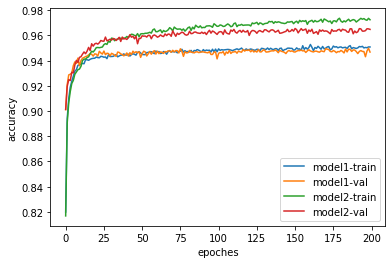

In [41]:
plt.plot(history_1.history['binary_accuracy'],label='model1-train')
plt.plot(history_1.history['val_binary_accuracy'],label='model1-val')
plt.plot(history_2.history['binary_accuracy'],label='model2-train')
plt.plot(history_2.history['val_binary_accuracy'],label='model2-val')

plt.ylabel('accuracy')
plt.xlabel('epoches')
plt.legend()

In [50]:
model_1.load_weights('C:/Users/gg246/lab3-log/models/Best.model1.h5')
model_2.load_weights(model_dir+'/Best.model2.h5')

loss_1 , accuracy_1 = model_1.evaluate(x_test_noral , y_test)
loss_2 , accuracy_2 = model_2.evaluate(x_test_hot , y_test)

print('model:{}%\nmodel2{}%'.format(accuracy_1 , accuracy_2))


10000/10000 [==============================] - 0s 28us/sample - loss: 0.0990 - binary_accuracy: 0.9671
model:0.9526000022888184%
model20.9671000242233276%


In [56]:
ven = np.expand_dims(pokemon_hot[3],axis=0) #妙蛙花
char =np.expand_dims(pokemon_hot[7],axis=0) # 噴火龍
blas = np.expand_dims(pokemon_hot[12],axis=0) # 水箭龜


In [58]:
pred =model_2.predict(np.concatenate([ven,char], axis=-1))
winner = '妙蛙花' if pred<0.5 else'噴火龍'
print('pred={},{}獲勝'.format(pred,winner))

pred =model_2.predict(np.concatenate([char,blas], axis=-1))
winner = '噴火龍' if pred<0.5 else'水箭龜'
print('pred={},{}獲勝'.format(pred,winner))

pred =model_2.predict(np.concatenate([blas,ven], axis=-1))
winner = '水箭龜' if pred<0.5 else'妙蛙花'
print('pred={},{}獲勝'.format(pred,winner))


pred=[[0.9999993]],噴火龍獲勝
pred=[[2.7424705e-05]],噴火龍獲勝
pred=[[0.9999957]],妙蛙花獲勝
